In [17]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/nlp-getting-started/data')

Skipping, found downloaded files in ".\nlp-getting-started" (use force=True to force download)


Importing Libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))
import spacy
import scipy.sparse
scipy.linalg.triu
from tqdm import tqdm
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import FunctionTransformer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder, StandardScaler

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prata\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora\stopwords.zip.


In [19]:
df = pd.read_csv('train.csv')

In [20]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [26]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [27]:
df['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [28]:
df['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [29]:
df.duplicated().sum()

0

Exploratary Data Analysis

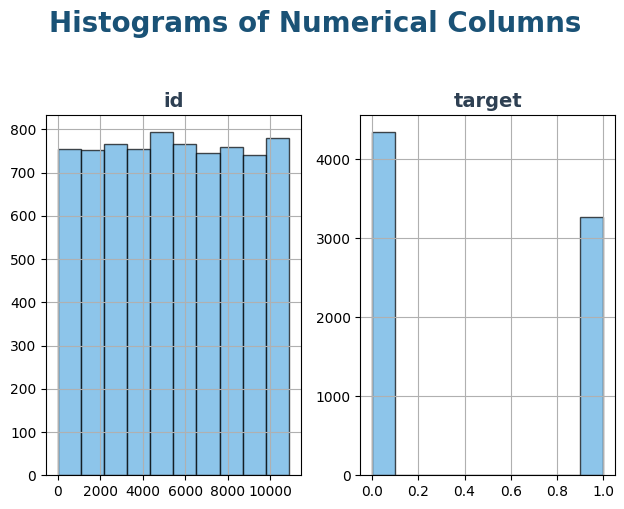

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.select_dtypes(include='number').columns))

for i, col in enumerate(df.select_dtypes(include='number').columns):
    ax = axes[i]
    df[col].hist(ax=ax, color='#5DADE2', edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=14, fontweight='bold', color='#2E4053')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.suptitle('Histograms of Numerical Columns', fontsize=20, fontweight='bold', color='#1A5276', y=1.05)
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

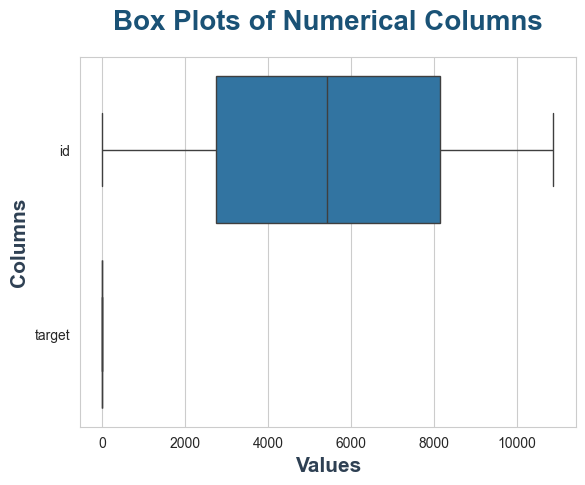

In [45]:
sns.set_style('whitegrid')
box = sns.boxplot(data=df, orient='h')

plt.xlabel('Values', fontsize=15, fontweight='bold', color='#2E4053')
plt.ylabel('Columns', fontsize=15, fontweight='bold', color='#2E4053')
plt.title('Box Plots of Numerical Columns', fontsize=20, fontweight='bold', color='#1A5276', pad=20)

ax.tick_params(axis='x', colors='#2E4053', labelsize=12)
ax.tick_params(axis='y', colors='#2E4053', labelsize=12)

for patch in ax.artists:
    patch.set_edgecolor('#1A5276')
    patch.set_linewidth(2)

plt.show()

<Axes: >

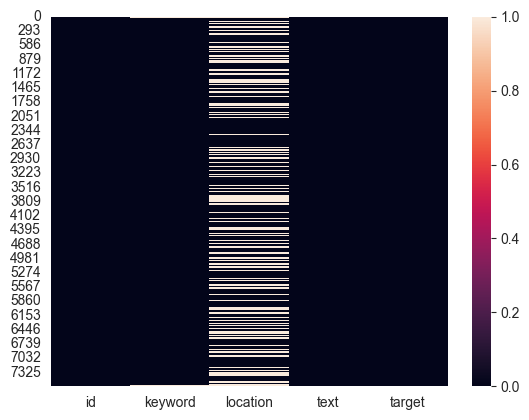

In [46]:
sns.heatmap(df.isnull())

Feature Engineering

In [49]:
df['keyword'] = df['keyword'].fillna(df['keyword'].mode()[0])
df['location'] = df['location'].fillna(value='Missing')

In [54]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [55]:
df.head()

,id,keyword,location,text,target
0,1,fatalities,Missing,Our Deeds are the Reason of this #earthquake M...,1
1,4,fatalities,Missing,Forest fire near La Ronge Sask. Canada,1
2,5,fatalities,Missing,All residents asked to 'shelter in place' are ...,1
3,6,fatalities,Missing,"13,000 people receive #wildfires evacuation or...",1
4,7,fatalities,Missing,Just got sent this photo from Ruby #Alaska as ...,1


In [57]:
df = df.drop('id', axis=1)

In [58]:
df.head()

,keyword,location,text,target
0,fatalities,Missing,Our Deeds are the Reason of this #earthquake M...,1
1,fatalities,Missing,Forest fire near La Ronge Sask. Canada,1
2,fatalities,Missing,All residents asked to 'shelter in place' are ...,1
3,fatalities,Missing,"13,000 people receive #wildfires evacuation or...",1
4,fatalities,Missing,Just got sent this photo from Ruby #Alaska as ...,1


Encoding 'Keyword' and 'Location' Columns

In [60]:
le = LabelEncoder()

In [61]:
df['keyword'] = le.fit_transform(df['keyword'])
df['location'] = le.fit_transform(df['location'])

In [62]:
df.head()

,keyword,location,text,target
0,104,1690,Our Deeds are the Reason of this #earthquake M...,1
1,104,1690,Forest fire near La Ronge Sask. Canada,1
2,104,1690,All residents asked to 'shelter in place' are ...,1
3,104,1690,"13,000 people receive #wildfires evacuation or...",1
4,104,1690,Just got sent this photo from Ruby #Alaska as ...,1


NLP on Text Column

In [64]:
df['text'] = df['text'].str.lower()

In [66]:
pd.DataFrame(df['text'].head())

,text
0,our deeds are the reason of this #earthquake m...
1,forest fire near la ronge sask. canada
2,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,just got sent this photo from ruby #alaska as ...


In [67]:
#removing html tags
def remove_html_tags(text):
    clean_text = re.sub('<.*?>', '', text)
    return clean_text

In [68]:
df['text'] = df['text'].apply(remove_html_tags)

In [69]:
pd.DataFrame(df['text'].head())

,text
0,our deeds are the reason of this #earthquake m...
1,forest fire near la ronge sask. canada
2,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,just got sent this photo from ruby #alaska as ...


In [70]:
#removing URL
def remove_url(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    clean_text = re.sub(url_pattern, '', text)
    return clean_text

In [71]:
df['text'] = df['text'].apply(remove_url)

In [72]:
pd.DataFrame(df['text'].head())

,text
0,our deeds are the reason of this #earthquake m...
1,forest fire near la ronge sask. canada
2,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,just got sent this photo from ruby #alaska as ...


In [73]:
#Removing Punctuations
def punctuations(text):
    punctation = string.punctuation
    clean_text = text.translate(str.maketrans('','', punctation))
    return clean_text

In [74]:
df['text'] = df['text'].apply(punctuations)

In [75]:
pd.DataFrame(df['text'].head())

,text
0,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby alaska as s...


In [76]:
#Chat Word Treatment
chat_words_mapping = {
    "lol": "laughing out loud",
    "brb": "be right back",
    "btw": "by the way",
    "afk": "away from keyboard",
    "rofl": "rolling on the floor laughing",
    "ttyl": "talk to you later",
    "np": "no problem",
    "thx": "thanks",
    "omg": "oh my god",
    "idk": "I don't know",
    "np": "no problem",
    "gg": "good game",
    "g2g": "got to go",
    "b4": "before",
    "cu": "see you",
    "yw": "you're welcome",
    "wtf": "what the f*ck",
    "imho": "in my humble opinion",
    "jk": "just kidding",
    "gf": "girlfriend",
    "bf": "boyfriend",
    "u": "you",
    "r": "are",
    "2": "to",
    "4": "for",
    "b": "be",
    "c": "see",
    "y": "why",
    "tho": "though",
    "smh": "shaking my head",
    "lolz": "laughing out loud",
    "h8": "hate",
    "luv": "love",
    "pls": "please",
    "sry": "sorry",
    "tbh": "to be honest",
    "omw": "on my way",
    "omw2syg": "on my way to see your girlfriend",
}

def expand_chat_words(text):
    words = text.split()
    expanded_words = [chat_words_mapping.get(word.lower(), word) for word in words]
    return ' '.join(expanded_words)

In [77]:
df['text'] = df['text'].apply(expand_chat_words)

In [78]:
pd.DataFrame(df['text'].head())

,text
0,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby alaska as s...


In [103]:
#Removing Stoping Words
def remove_stop_words(text):
	tokens = nltk.word_tokenize(text)
	stop_words = set(stopwords.words('english'))
	filtered_tokens = [token for token in tokens if token not in stop_words]
	preprocessed_text = ' '.join(filtered_tokens)
	return preprocessed_text

In [104]:
df['text'] = df['text'].apply(remove_stop_words)

In [105]:
pd.DataFrame(df['text'].head())

,text
0,deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask canada
2,residents asked shelter place notified officer...
3,13000 people receive wildfires evacuation orde...
4,got sent photo ruby alaska smoke wildfires pou...


In [106]:
#Replacing Emojis with meanings
def replace_emojis_with_meanings(text):
    def replace(match):
        emoji_char = match.group()
        emoji_meaning = emoji.demojize(emoji_char)
        return emoji_meaning

    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"
                            u"\U0001F300-\U0001F5FF"
                            u"\U0001F680-\U0001F6FF"
                            u"\U0001F1E0-\U0001F1FF"
                            u"\U00002500-\U00002BEF"
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"
                            u"\u3030"
                            "]+", flags=re.UNICODE)
    text_with_meanings = emoji_pattern.sub(replace, text)
    return text_with_meanings

In [107]:
df['text'] = df['text'].apply(replace_emojis_with_meanings)

In [108]:
pd.DataFrame(df['text'].head())

,text
0,deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask canada
2,residents asked shelter place notified officer...
3,13000 people receive wildfires evacuation orde...
4,got sent photo ruby alaska smoke wildfires pou...


In [111]:
#Word Tokenize
def word_tokenization(text):
    return nltk.word_tokenize(text)

In [112]:
df['token_text'] = df['text'].apply(word_tokenization)

In [113]:
pd.DataFrame(df['token_text'].head())

,token_text
0,"[deeds, reason, earthquake, may, allah, forgiv..."
1,"[forest, fire, near, la, ronge, sask, canada]"
2,"[residents, asked, shelter, place, notified, o..."
3,"[13000, people, receive, wildfires, evacuation..."
4,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [123]:
#POS Tagging
nlp = spacy.load('en_core_web_sm', disable=['ner', 'textcat'])

def batch_pos_tagging(texts):
    docs = list(nlp.pipe(texts, batch_size=50))
    return [[(token.text, token.pos_) for token in doc] for doc in docs]

batch_size = 50
num_batches = (len(df) + batch_size - 1) // batch_size

pos_tags = []
for i in tqdm(range(num_batches)):
    start = i * batch_size
    end = min((i + 1) * batch_size, len(df))
    batch_texts = df['text'][start:end].tolist()
    pos_tags.extend(batch_pos_tagging(batch_texts))

df['POS_Tags'] = pos_tags

100%|██████████| 153/153 [00:05<00:00, 27.61it/s]


In [124]:
df.head()

,keyword,location,text,target,token_text,POS_Tags
0,104,1690,deeds reason earthquake may allah forgive us,1,d e e d s r e a s o n e a r t h q u a k e ...,"[(deeds, VERB), (reason, NOUN), (earthquake, N..."
1,104,1690,forest fire near la ronge sask canada,1,f o r e s t f i r e n e a r l a r o n ...,"[(forest, NOUN), (fire, NOUN), (near, ADP), (l..."
2,104,1690,residents asked shelter place notified officer...,1,r e s i d e n t s a s k e d s h e l t e r ...,"[(residents, NOUN), (asked, VERB), (shelter, N..."
3,104,1690,13000 people receive wildfires evacuation orde...,1,1 3 0 0 0 p e o p l e r e c e i v e w i ...,"[(13000, NUM), (people, NOUN), (receive, VERB)..."
4,104,1690,got sent photo ruby alaska smoke wildfires pou...,1,g o t s e n t p h o t o r u b y a l a ...,"[(got, AUX), (sent, VERB), (photo, NOUN), (rub..."


In [125]:
df['token_text'] = df['token_text'].apply(lambda x: ' '.join(x))
df['POS_Tags'] = df['POS_Tags'].apply(lambda x: ' '.join([i[1] for i in x]))

In [126]:
df.head()

,keyword,location,text,target,token_text,POS_Tags
0,104,1690,deeds reason earthquake may allah forgive us,1,d e e d s r e a s o n ...,VERB NOUN NOUN AUX PROPN VERB PRON
1,104,1690,forest fire near la ronge sask canada,1,f o r e s t f i r e ...,NOUN NOUN ADP PRON PROPN PROPN PROPN
2,104,1690,residents asked shelter place notified officer...,1,r e s i d e n t s a s ...,NOUN VERB NOUN NOUN VERB NOUN NOUN NOUN NOUN N...
3,104,1690,13000 people receive wildfires evacuation orde...,1,1 3 0 0 0 p e o p l e ...,NUM NOUN VERB NOUN NOUN NOUN PROPN
4,104,1690,got sent photo ruby alaska smoke wildfires pou...,1,g o t s e n t p h o ...,AUX VERB NOUN PROPN PROPN NOUN VERB VERB NOUN


Modeling

In [149]:
class TextLengthExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(X['text'].apply(len))

class NumHashtagsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(X['text'].apply(lambda x: len([word for word in x.split() if word.startswith('#')])))

class NumMentionsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(X['text'].apply(lambda x: len([word for word in x.split() if word.startswith('@')])))

In [154]:
#Train Test Split
X = df[['text']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
#Creating Pipeline
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('selector', FunctionTransformer(lambda x: x['text'], validate=False)),
            ('tfidf', TfidfVectorizer(max_features=10000))
        ])),
        ('text_length', Pipeline([
            ('selector', FunctionTransformer(lambda x: x, validate=False)),
            ('extract', TextLengthExtractor())
        ])),
        ('num_hashtags', Pipeline([
            ('selector', FunctionTransformer(lambda x: x, validate=False)),
            ('extract', NumHashtagsExtractor())
        ])),
        ('num_mentions', Pipeline([
            ('selector', FunctionTransformer(lambda x: x, validate=False)),
            ('extract', NumMentionsExtractor())
        ]))
    ])),
    ('clf', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1))
])

In [156]:
param_grid = {
    'features__text__tfidf__max_features': [5000, 10000],
    'clf__n_estimators': [100, 200],
    'clf__learning_rate': [0.1, 0.01]
}

In [157]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('text',
                                                                        Pipeline(steps=[('selector',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x000002DFA716DC60>)),
                                                                                        ('tfidf',
                                                                                         TfidfVectorizer(max_features=10000))])),
                                                                       ('text_length',
                                                                        Pipeline(steps=[('selector',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x000002DFA716C2C0>)),
                                                                                        ('e...
                                                                                         NumHashtagsExtractor())])),
                                                                       ('num_mentions',
                                                                        Pipeline(steps=[('selector',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x000002DFA716C400>)),
                                                                                        ('extract',
                                                                                         NumMentionsExtractor())]))])),
                                       ('clf', GradientBoostingClassifier())]),
             n_jobs=1,
             param_grid={'clf__learning_rate': [0.1, 0.01],
                         'clf__n_estimators': [100, 200],
                         'features__text__tfidf__max_features': [5000, 10000]},
             scoring='f1')

In [158]:
#Pridictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       874
           1       0.83      0.55      0.66       649

    accuracy                           0.76      1523
   macro avg       0.78      0.73      0.74      1523
weighted avg       0.77      0.76      0.75      1523



Submission

In [160]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [161]:
test_X = test_df[['text']]

In [162]:
y_pred_submission = best_model.predict(test_X)

In [163]:
submission_df = pd.DataFrame({'id':test_df['id'], 'target':y_pred_submission})
submission_df.to_csv('submission.csv', index=False)

Thank You

In [164]:
result = pd.read_csv('submission.csv')

Thank you